In [1]:
import pandas as pd
import pm4py
from pm4py.objects.log.importer.xes import importer as xes_importer

file_path = 'BPI_Challenge_2012.xes'

# Carregar log e exibir algumas linhas

In [2]:
log = xes_importer.apply(file_path)

In [25]:
print(log[0]) #prints the first trace of the log
print(len(log[0]))
print(log[0][0]) #prints the first event of the first trace

{'attributes': {'REG_DATE': datetime.datetime(2011, 10, 1, 0, 38, 44, 546000, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200))), 'concept:name': '173688', 'AMOUNT_REQ': '20000'}, 'events': [{'org:resource': '112', 'lifecycle:transition': 'COMPLETE', 'concept:name': 'A_SUBMITTED', 'time:timestamp': datetime.datetime(2011, 10, 1, 0, 38, 44, 546000, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200)))}, '..', {'org:resource': '10629', 'lifecycle:transition': 'COMPLETE', 'concept:name': 'W_Valideren aanvraag', 'time:timestamp': datetime.datetime(2011, 10, 13, 10, 37, 37, 26000, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200)))}]}
26
{'org:resource': '112', 'lifecycle:transition': 'COMPLETE', 'concept:name': 'A_SUBMITTED', 'time:timestamp': datetime.datetime(2011, 10, 1, 0, 38, 44, 546000, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200)))}


In [26]:
print(log[1]) #prints the first trace of the log
print(len(log[1]))

{'attributes': {'REG_DATE': datetime.datetime(2011, 10, 1, 8, 8, 58, 256000, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200))), 'concept:name': '173691', 'AMOUNT_REQ': '5000'}, 'events': [{'org:resource': '112', 'lifecycle:transition': 'COMPLETE', 'concept:name': 'A_SUBMITTED', 'time:timestamp': datetime.datetime(2011, 10, 1, 8, 8, 58, 256000, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200)))}, '..', {'org:resource': '10809', 'lifecycle:transition': 'COMPLETE', 'concept:name': 'W_Valideren aanvraag', 'time:timestamp': datetime.datetime(2011, 10, 10, 14, 17, 34, 633000, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200)))}]}
39


In [27]:
print([ev['concept:name'] for ev in log[0]])

['A_SUBMITTED', 'A_PARTLYSUBMITTED', 'A_PREACCEPTED', 'W_Completeren aanvraag', 'W_Completeren aanvraag', 'A_ACCEPTED', 'O_SELECTED', 'A_FINALIZED', 'O_CREATED', 'O_SENT', 'W_Nabellen offertes', 'W_Completeren aanvraag', 'W_Nabellen offertes', 'W_Nabellen offertes', 'W_Nabellen offertes', 'W_Nabellen offertes', 'W_Nabellen offertes', 'O_SENT_BACK', 'W_Valideren aanvraag', 'W_Nabellen offertes', 'W_Valideren aanvraag', 'A_REGISTERED', 'A_APPROVED', 'O_ACCEPTED', 'A_ACTIVATED', 'W_Valideren aanvraag']


# Montar Bag of Words do log

In [118]:
from collections import defaultdict

bow = []
for trace in log:
    bow_line = defaultdict(float)
    for event in trace:
        bow_line[event['concept:name']] += 1.
    bow_line['last_ativ'] = trace[-1]['concept:name']
    bow_line['len_trace'] = len(trace)
    bow_line['tempo_total'] = trace[-1]['time:timestamp'] - trace[1]['time:timestamp']
    bow.append(bow_line)
        

In [120]:
from datetime import timedelta

df_bow = pd.DataFrame(bow)
S_tempo_total = df_bow.tempo_total.fillna(timedelta(0))
columns = list(df_bow.columns)
columns.remove('tempo_total')
print(columns)
df_bow = df_bow[columns].fillna(0.)
df_bow['tempo_total'] = S_tempo_total
df_bow

['A_SUBMITTED', 'A_PARTLYSUBMITTED', 'A_PREACCEPTED', 'W_Completeren aanvraag', 'A_ACCEPTED', 'O_SELECTED', 'A_FINALIZED', 'O_CREATED', 'O_SENT', 'W_Nabellen offertes', 'O_SENT_BACK', 'W_Valideren aanvraag', 'A_REGISTERED', 'A_APPROVED', 'O_ACCEPTED', 'A_ACTIVATED', 'last_ativ', 'len_trace', 'O_CANCELLED', 'W_Wijzigen contractgegevens', 'A_DECLINED', 'A_CANCELLED', 'W_Afhandelen leads', 'O_DECLINED', 'W_Nabellen incomplete dossiers', 'W_Beoordelen fraude']


,A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,...,len_trace,O_CANCELLED,W_Wijzigen contractgegevens,A_DECLINED,A_CANCELLED,W_Afhandelen leads,O_DECLINED,W_Nabellen incomplete dossiers,W_Beoordelen fraude,tempo_total
0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,7.0,...,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12 days 09:58:52.146000
1,1.0,1.0,1.0,5.0,1.0,2.0,1.0,2.0,2.0,10.0,...,39,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9 days 06:08:32.438000
2,1.0,1.0,1.0,9.0,1.0,3.0,1.0,3.0,3.0,25.0,...,59,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,137 days 05:18:55.708000
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0 days 00:00:37.385000
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0 days 00:00:40.935000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13082,1.0,1.0,1.0,5.0,1.0,2.0,1.0,2.0,2.0,10.0,...,29,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8 days 11:39:23.699000
13083,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0 days 00:00:40.760000
13084,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0 days 09:59:25.749000
13085,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,...,17,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,9 days 13:07:44.982000


In [121]:
df_bow['tempo_dias'] = S_tempo_total.apply(lambda x: float(x.days))

In [122]:
import numpy as np

df_bow['tempo_dias_log'] = np.log(df_bow['tempo_dias'] + 1)

In [123]:
df_bow = pd.get_dummies(df_bow, columns=['last_ativ'])

In [124]:
df_bow = df_bow.drop(columns=['tempo_total'])

In [125]:
df_bow

,A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,...,last_ativ_A_DECLINED,last_ativ_A_REGISTERED,last_ativ_O_CANCELLED,last_ativ_W_Afhandelen leads,last_ativ_W_Beoordelen fraude,last_ativ_W_Completeren aanvraag,last_ativ_W_Nabellen incomplete dossiers,last_ativ_W_Nabellen offertes,last_ativ_W_Valideren aanvraag,last_ativ_W_Wijzigen contractgegevens
0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,7.0,...,0,0,0,0,0,0,0,0,1,0
1,1.0,1.0,1.0,5.0,1.0,2.0,1.0,2.0,2.0,10.0,...,0,0,0,0,0,0,0,0,1,0
2,1.0,1.0,1.0,9.0,1.0,3.0,1.0,3.0,3.0,25.0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13082,1.0,1.0,1.0,5.0,1.0,2.0,1.0,2.0,2.0,10.0,...,0,0,0,0,0,0,0,1,0,0
13083,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
13084,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
13085,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,...,0,0,0,0,0,0,0,1,0,0


## Conforme acima, o log contém 24 atividades de 13.087 casos.

In [126]:
# Exibe atividades mais repetidas
df_bow.max()

A_SUBMITTED                                   1.000000
A_PARTLYSUBMITTED                             1.000000
A_PREACCEPTED                                 1.000000
W_Completeren aanvraag                       68.000000
A_ACCEPTED                                    1.000000
O_SELECTED                                    7.000000
A_FINALIZED                                   1.000000
O_CREATED                                     7.000000
O_SENT                                        7.000000
W_Nabellen offertes                          69.000000
O_SENT_BACK                                   3.000000
W_Valideren aanvraag                         59.000000
A_REGISTERED                                  1.000000
A_APPROVED                                    1.000000
O_ACCEPTED                                    1.000000
A_ACTIVATED                                   1.000000
len_trace                                   175.000000
O_CANCELLED                                   6.000000
W_Wijzigen

In [127]:
df_bow.mean()

A_SUBMITTED                                  1.000000
A_PARTLYSUBMITTED                            1.000000
A_PREACCEPTED                                0.562925
W_Completeren aanvraag                       4.191182
A_ACCEPTED                                   0.390693
O_SELECTED                                   0.537174
A_FINALIZED                                  0.383205
O_CREATED                                    0.537174
O_SENT                                       0.537174
W_Nabellen offertes                          3.974631
O_SENT_BACK                                  0.263926
W_Valideren aanvraag                         1.590051
A_REGISTERED                                 0.171621
A_APPROVED                                   0.171621
O_ACCEPTED                                   0.171391
A_ACTIVATED                                  0.171621
len_trace                                   20.035149
O_CANCELLED                                  0.279285
W_Wijzigen contractgegevens 

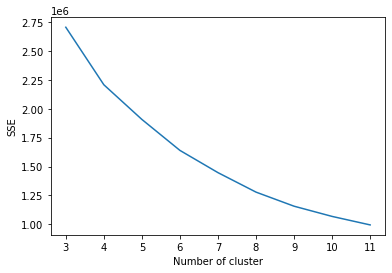

In [128]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df_bow.values

sse = {}
for k in range(3, 12):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [129]:
kmeans = KMeans(n_clusters=8).fit(X)

In [130]:
df_bow['cluster'] = kmeans.labels_

In [131]:
dfs = {}
for k in range(8):
    dfs[k] = df_bow[df_bow.cluster == k]

In [132]:
print(len(dfs[0]))
dfs[1].mean()

2506


A_SUBMITTED                                 1.000000
A_PARTLYSUBMITTED                           1.000000
A_PREACCEPTED                               0.200672
W_Completeren aanvraag                      0.994822
A_ACCEPTED                                  0.010216
O_SELECTED                                  0.000840
A_FINALIZED                                 0.000840
O_CREATED                                   0.000840
O_SENT                                      0.000840
W_Nabellen offertes                         0.002379
O_SENT_BACK                                 0.000000
W_Valideren aanvraag                        0.000000
A_REGISTERED                                0.000000
A_APPROVED                                  0.000000
O_ACCEPTED                                  0.000000
A_ACTIVATED                                 0.000000
len_trace                                   5.655192
O_CANCELLED                                 0.000420
W_Wijzigen contractgegevens                 0.

In [133]:
print(len(dfs[1]))
dfs[1].mean()

7146


A_SUBMITTED                                 1.000000
A_PARTLYSUBMITTED                           1.000000
A_PREACCEPTED                               0.200672
W_Completeren aanvraag                      0.994822
A_ACCEPTED                                  0.010216
O_SELECTED                                  0.000840
A_FINALIZED                                 0.000840
O_CREATED                                   0.000840
O_SENT                                      0.000840
W_Nabellen offertes                         0.002379
O_SENT_BACK                                 0.000000
W_Valideren aanvraag                        0.000000
A_REGISTERED                                0.000000
A_APPROVED                                  0.000000
O_ACCEPTED                                  0.000000
A_ACTIVATED                                 0.000000
len_trace                                   5.655192
O_CANCELLED                                 0.000420
W_Wijzigen contractgegevens                 0.

In [134]:
df_clusters = pd.DataFrame([df.mean() for df in dfs.values()])


In [135]:
df_clusters

,A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,...,last_ativ_A_REGISTERED,last_ativ_O_CANCELLED,last_ativ_W_Afhandelen leads,last_ativ_W_Beoordelen fraude,last_ativ_W_Completeren aanvraag,last_ativ_W_Nabellen incomplete dossiers,last_ativ_W_Nabellen offertes,last_ativ_W_Valideren aanvraag,last_ativ_W_Wijzigen contractgegevens,cluster
0,1.0,1.0,0.997207,6.215084,0.853951,0.947326,0.845172,0.947326,0.947326,5.262969,...,0.000399,0.002793,0.002394,0.000399,0.145650,0.025140,0.339984,0.475259,0.000000,0.0
1,1.0,1.0,0.200672,0.994822,0.010216,0.000840,0.000840,0.000840,0.000840,0.002379,...,0.000000,0.000000,0.311643,0.007697,0.199552,0.000000,0.000700,0.000000,0.000000,1.0
2,1.0,1.0,1.000000,10.415323,1.000000,2.278226,1.000000,2.278226,2.278226,30.177419,...,0.000000,0.189516,0.000000,0.000000,0.000000,0.076613,0.233871,0.298387,0.004032,2.0
3,1.0,1.0,1.000000,5.606458,1.000000,1.319879,0.998991,1.319879,1.319879,16.106963,...,0.000000,0.224016,0.000000,0.000000,0.000000,0.016145,0.319879,0.255298,0.002018,3.0
4,1.0,1.0,0.999095,5.933032,0.999095,1.530317,0.999095,1.530317,1.530317,8.611765,...,0.000000,0.000000,0.000905,0.000000,0.000000,0.186425,0.029864,0.780995,0.000905,4.0
5,1.0,1.0,1.000000,23.798978,0.090290,0.078365,0.076661,0.078365,0.078365,0.497445,...,0.000000,0.003407,0.000000,0.001704,0.252129,0.000000,0.042589,0.020443,0.000000,5.0
6,1.0,1.0,1.000000,6.779582,1.000000,2.037123,1.000000,2.037123,2.037123,10.763341,...,0.000000,0.002320,0.000000,0.000000,0.000000,0.271462,0.000000,0.726218,0.000000,6.0
7,1.0,1.0,1.000000,7.931507,1.000000,2.219178,1.000000,2.219178,2.219178,12.561644,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.424658,0.000000,0.561644,0.000000,7.0


### A primeira tentativa de clusterização encontrou muitos clusters, analisando rapidamente os dados não emerge um padrão

Vamos transformar o BoW em uma matriz de ocorre/não ocorre a atividade e analisar tanto as variações, excluindo loops, e a correlação, isto é, atividades que ocorrem sempre juntas.

In [136]:
df_one = df_bow.apply(lambda x: x  > 0.)

In [137]:
df_one

,A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,...,last_ativ_A_REGISTERED,last_ativ_O_CANCELLED,last_ativ_W_Afhandelen leads,last_ativ_W_Beoordelen fraude,last_ativ_W_Completeren aanvraag,last_ativ_W_Nabellen incomplete dossiers,last_ativ_W_Nabellen offertes,last_ativ_W_Valideren aanvraag,last_ativ_W_Wijzigen contractgegevens,cluster
0,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,True,False,False
1,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,True,False,True
2,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,True,True
3,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13082,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,True,False,False,False
13083,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
13084,True,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
13085,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,True,False,False,False


In [138]:
df_one.drop_duplicates()

,A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,...,last_ativ_A_REGISTERED,last_ativ_O_CANCELLED,last_ativ_W_Afhandelen leads,last_ativ_W_Beoordelen fraude,last_ativ_W_Completeren aanvraag,last_ativ_W_Nabellen incomplete dossiers,last_ativ_W_Nabellen offertes,last_ativ_W_Valideren aanvraag,last_ativ_W_Wijzigen contractgegevens,cluster
0,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,True,False,False
1,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,True,False,True
2,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,True,True
3,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,True,True,True,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12725,True,True,True,True,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
12814,True,True,True,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
12911,True,True,True,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
12927,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,True,False,False,False,False,False


In [139]:
df_bow.drop_duplicates()

,A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,O_CREATED,O_SENT,W_Nabellen offertes,...,last_ativ_A_REGISTERED,last_ativ_O_CANCELLED,last_ativ_W_Afhandelen leads,last_ativ_W_Beoordelen fraude,last_ativ_W_Completeren aanvraag,last_ativ_W_Nabellen incomplete dossiers,last_ativ_W_Nabellen offertes,last_ativ_W_Valideren aanvraag,last_ativ_W_Wijzigen contractgegevens,cluster
0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,7.0,...,0,0,0,0,0,0,0,1,0,0
1,1.0,1.0,1.0,5.0,1.0,2.0,1.0,2.0,2.0,10.0,...,0,0,0,0,0,0,0,1,0,4
2,1.0,1.0,1.0,9.0,1.0,3.0,1.0,3.0,3.0,25.0,...,0,0,0,0,0,0,0,0,1,2
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
5,1.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13076,1.0,1.0,1.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
13078,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,5.0,...,0,0,0,0,0,0,0,1,0,0
13079,1.0,1.0,1.0,9.0,1.0,1.0,1.0,1.0,1.0,3.0,...,0,0,0,0,0,0,1,0,0,0
13081,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,7.0,...,0,0,0,0,0,0,0,1,0,0


## Eliminando apenas os loops, a quantidade de variações cai de 4.366 para 3.159.

## Eliminando loops e ordem, a quantidade de variações cai de 4.366 para 120.


Explicação: 

Foram analisadas nos notebooks anteriores as variações dos traces utilizando o PM4PY, chegando a um total de 4.366 variantes para 13.087 casos. O Bag of Words elimina a ordem das atividades, e analisando-se este obtém-se 3.159 variações. Excluindo também a contagem de atividades, baixamos para apenas 120 variações ocorrendo na matriz.

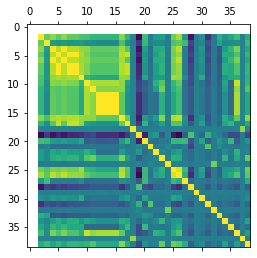

In [140]:
import matplotlib.pyplot as plt

plt.matshow(df_bow.corr())
plt.show()

<AxesSubplot:>

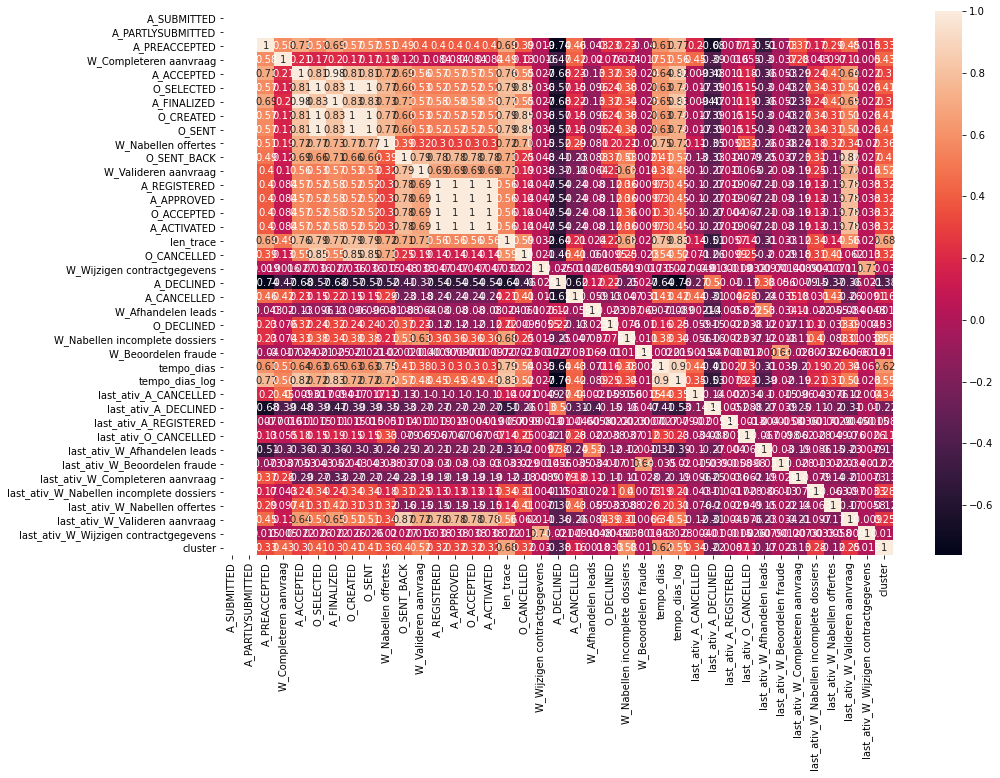

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(df_bow.corr(), annot=True)

In [142]:
import numpy as np

# Create correlation matrix
corr_matrix = df_bow.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

to_drop = [*to_drop, 'A_SUBMITTED', 'A_PARTLYSUBMITTED']
# Drop features 
df_bow_reduced = df_bow.drop(to_drop, axis=1)

print('Colunas excluídas por ter gerado nan ou por correlação > 0.95: ', to_drop)

Colunas excluídas por ter gerado nan ou por correlação > 0.95:  ['A_FINALIZED', 'O_CREATED', 'O_SENT', 'A_APPROVED', 'O_ACCEPTED', 'A_ACTIVATED', 'A_SUBMITTED', 'A_PARTLYSUBMITTED']


<ipython-input-142-cce6f74a05f5>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


<AxesSubplot:>

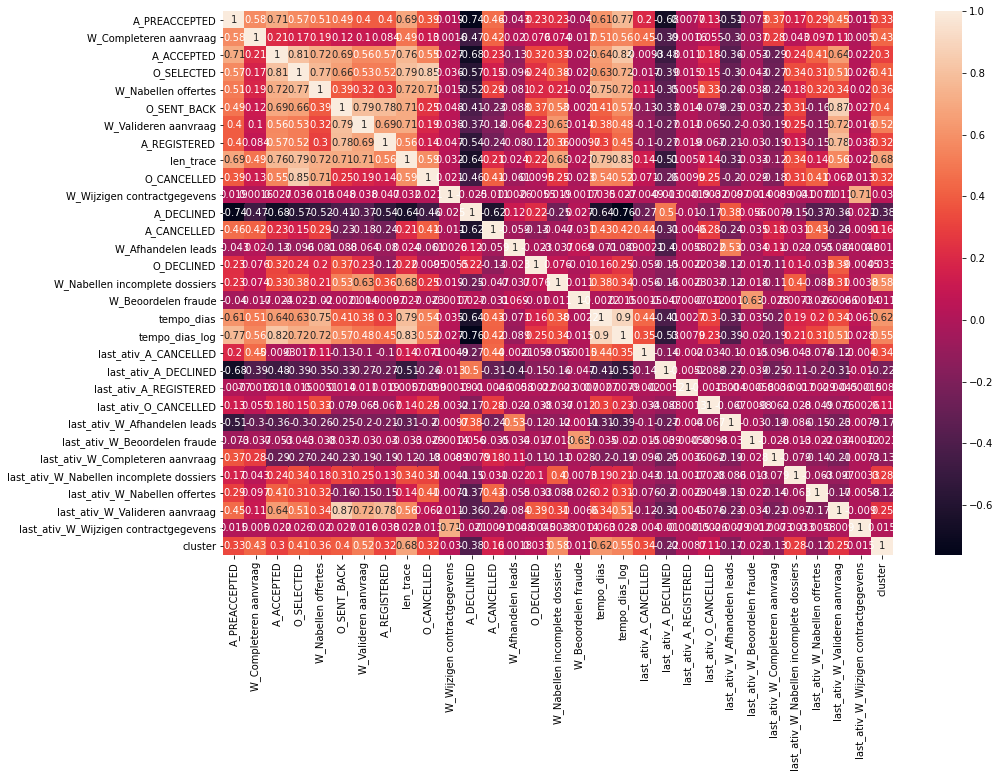

In [143]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_bow_reduced.corr(), annot=True)

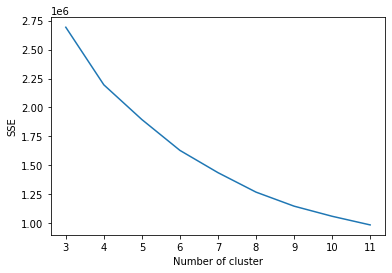

In [144]:
X = df_bow_reduced.drop(['cluster'], axis=1).values

sse = {}
for k in range(3, 12):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [145]:
df_bow_reduced

,A_PREACCEPTED,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,W_Nabellen offertes,O_SENT_BACK,W_Valideren aanvraag,A_REGISTERED,len_trace,O_CANCELLED,...,last_ativ_A_REGISTERED,last_ativ_O_CANCELLED,last_ativ_W_Afhandelen leads,last_ativ_W_Beoordelen fraude,last_ativ_W_Completeren aanvraag,last_ativ_W_Nabellen incomplete dossiers,last_ativ_W_Nabellen offertes,last_ativ_W_Valideren aanvraag,last_ativ_W_Wijzigen contractgegevens,cluster
0,1.0,3.0,1.0,1.0,7.0,1.0,3.0,1.0,26,0.0,...,0,0,0,0,0,0,0,1,0,0
1,1.0,5.0,1.0,2.0,10.0,1.0,7.0,1.0,39,1.0,...,0,0,0,0,0,0,0,1,0,4
2,1.0,9.0,1.0,3.0,25.0,1.0,3.0,1.0,59,2.0,...,0,0,0,0,0,0,0,0,1,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13082,1.0,5.0,1.0,2.0,10.0,1.0,1.0,0.0,29,1.0,...,0,0,0,0,0,0,1,0,0,0
13083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,...,0,0,0,0,0,0,0,0,0,1
13084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,0.0,...,0,0,1,0,0,0,0,0,0,1
13085,1.0,3.0,1.0,1.0,3.0,0.0,0.0,0.0,17,0.0,...,0,0,0,0,0,0,1,0,0,0


In [146]:
kmeans = KMeans(n_clusters=9).fit(X)

In [147]:
df_bow_reduced['cluster'] = kmeans.labels_

In [148]:
dfs_reduced = {}
for k in range(9):
    dfs_reduced[k] = df_bow_reduced[df_bow_reduced.cluster == k]

In [149]:
df_clusters_reduced = pd.DataFrame([df.mean() for df in dfs_reduced.values()])

In [150]:
df_clusters_reduced

,A_PREACCEPTED,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,W_Nabellen offertes,O_SENT_BACK,W_Valideren aanvraag,A_REGISTERED,len_trace,O_CANCELLED,...,last_ativ_A_REGISTERED,last_ativ_O_CANCELLED,last_ativ_W_Afhandelen leads,last_ativ_W_Beoordelen fraude,last_ativ_W_Completeren aanvraag,last_ativ_W_Nabellen incomplete dossiers,last_ativ_W_Nabellen offertes,last_ativ_W_Valideren aanvraag,last_ativ_W_Wijzigen contractgegevens,cluster
0,0.999039,4.926033,0.995197,1.159462,6.895773,0.691643,3.006724,0.462056,28.548511,0.414505,...,0.00048,0.000961,0.000961,0.000000,0.002882,0.039866,0.313160,0.637368,0.000000,0.0
1,0.121917,0.426017,0.007398,0.000000,0.000000,0.000000,0.000000,0.000000,4.889334,0.000000,...,0.00000,0.000000,0.341091,0.008323,0.121609,0.000000,0.000000,0.000000,0.000000,1.0
2,1.000000,6.893048,1.000000,2.072193,10.989305,1.270053,11.270053,0.748663,72.152406,1.171123,...,0.00000,0.002674,0.000000,0.000000,0.000000,0.272727,0.000000,0.724599,0.000000,2.0
3,1.000000,5.874187,1.000000,1.339479,16.865510,0.270065,1.083514,0.146421,36.777657,1.019523,...,0.00000,0.244035,0.000000,0.000000,0.000000,0.016269,0.299349,0.241866,0.002169,3.0
4,1.000000,23.360065,0.088380,0.073650,0.441899,0.024550,0.080196,0.009820,29.798691,0.029460,...,0.00000,0.003273,0.000000,0.001637,0.261866,0.000000,0.036007,0.021277,0.000000,4.0
5,0.998986,6.016227,0.998986,1.573022,8.856998,1.051724,7.800203,0.750507,48.063895,0.641988,...,0.00000,0.000000,0.001014,0.000000,0.000000,0.204868,0.018256,0.773834,0.001014,5.0
6,1.000000,10.391892,1.000000,2.382883,31.054054,0.409910,2.418919,0.252252,63.490991,1.941441,...,0.00000,0.198198,0.000000,0.000000,0.000000,0.081081,0.229730,0.292793,0.004505,6.0
7,0.984962,8.081203,0.273684,0.244361,0.933083,0.036842,0.114286,0.019549,16.642105,0.171429,...,0.00000,0.003759,0.013534,0.001504,0.739850,0.000752,0.203759,0.033835,0.000000,7.0
8,1.000000,8.000000,1.000000,2.166667,11.958333,1.361111,12.583333,0.569444,115.541667,1.444444,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.430556,0.000000,0.555556,0.000000,8.0


<AxesSubplot:>

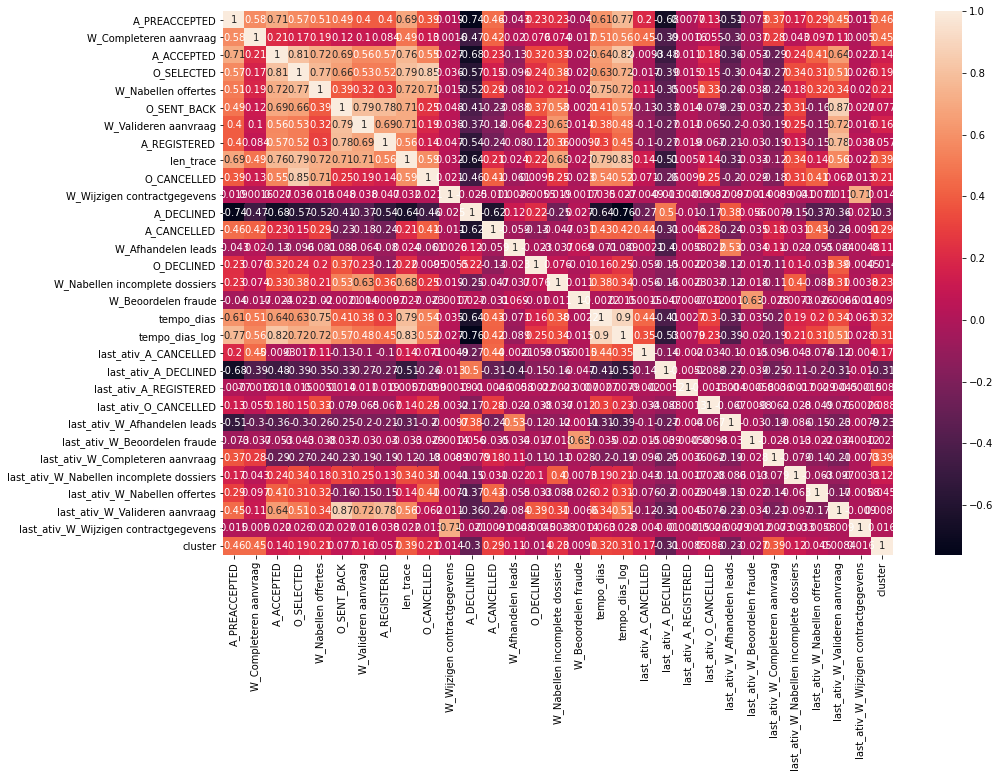

In [151]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_bow_reduced.corr(), annot=True)

In [152]:
df_bow_reduced_dummies = pd.get_dummies(df_bow_reduced, columns=['cluster'])

In [153]:
df_bow_reduced_dummies

,A_PREACCEPTED,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,W_Nabellen offertes,O_SENT_BACK,W_Valideren aanvraag,A_REGISTERED,len_trace,O_CANCELLED,...,last_ativ_W_Wijzigen contractgegevens,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,1.0,3.0,1.0,1.0,7.0,1.0,3.0,1.0,26,0.0,...,0,1,0,0,0,0,0,0,0,0
1,1.0,5.0,1.0,2.0,10.0,1.0,7.0,1.0,39,1.0,...,0,1,0,0,0,0,0,0,0,0
2,1.0,9.0,1.0,3.0,25.0,1.0,3.0,1.0,59,2.0,...,1,0,0,0,0,0,0,1,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,...,0,0,1,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13082,1.0,5.0,1.0,2.0,10.0,1.0,1.0,0.0,29,1.0,...,0,1,0,0,0,0,0,0,0,0
13083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,...,0,0,1,0,0,0,0,0,0,0
13084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,0.0,...,0,0,1,0,0,0,0,0,0,0
13085,1.0,3.0,1.0,1.0,3.0,0.0,0.0,0.0,17,0.0,...,0,0,0,0,0,0,0,0,1,0


<AxesSubplot:>

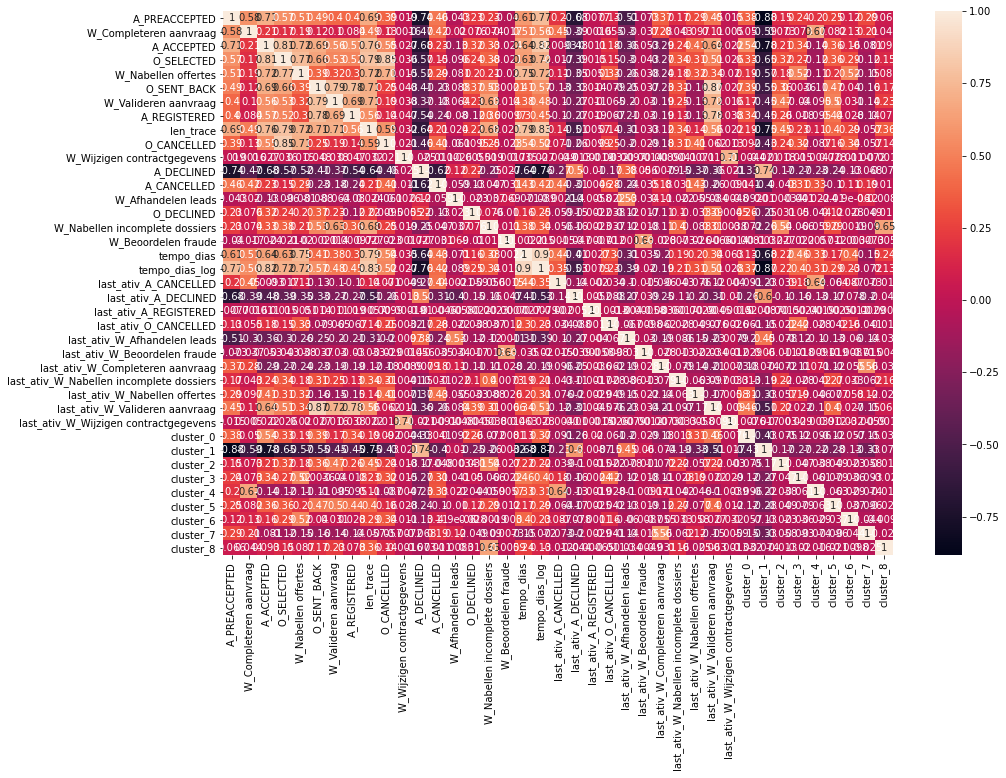

In [154]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_bow_reduced_dummies.corr(), annot=True)

<AxesSubplot:>

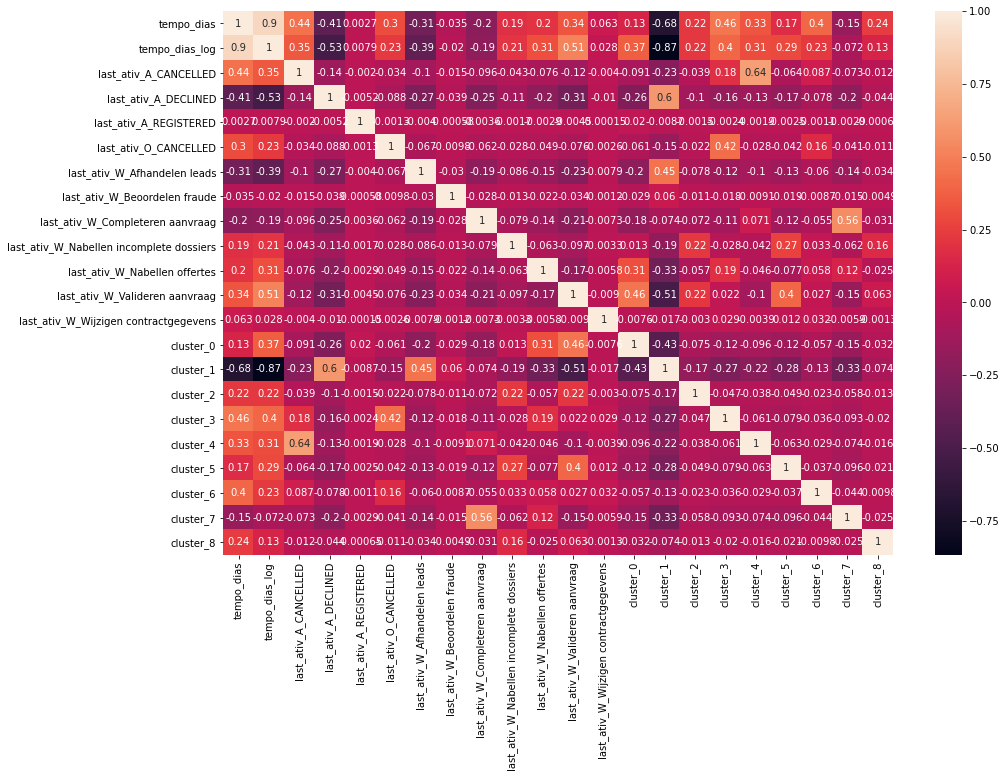

In [155]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_bow_reduced_dummies[df_bow_reduced_dummies.columns[17:]].corr(), annot=True)

<AxesSubplot:>

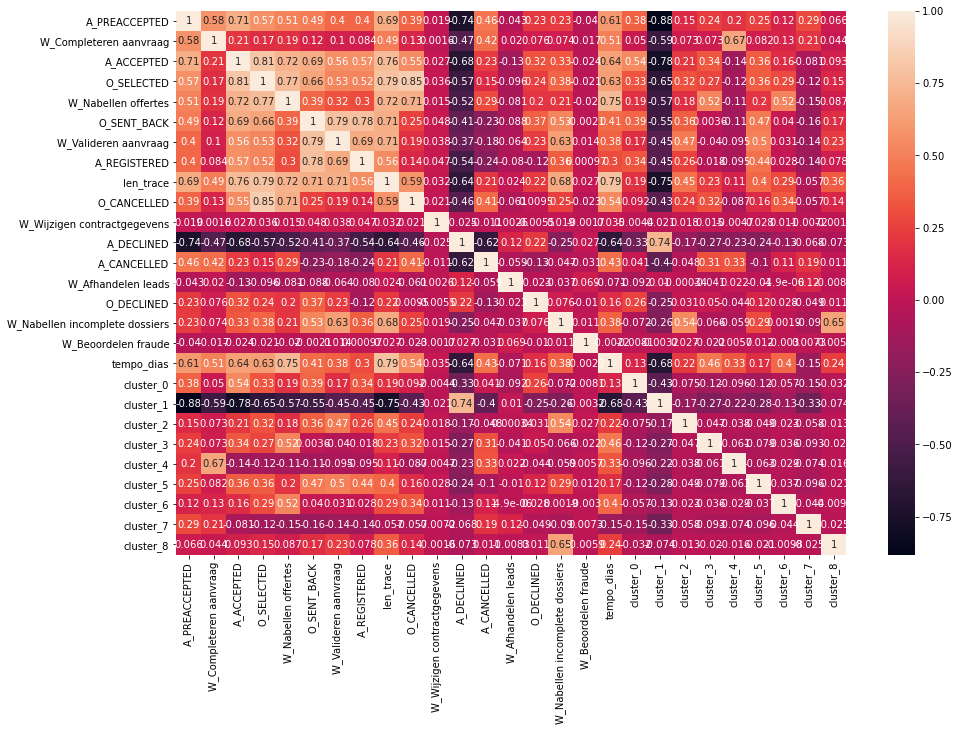

In [159]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_bow_reduced_dummies.drop(columns=df_bow_reduced_dummies.columns[18:30]).corr(), annot=True)

## Montar BoW parcial para predição


A predição precisa ser incompleta, então será necessário montar linhas com apenas os eventos iniciais.

In [170]:
from collections import defaultdict

bow = []
for trace in log:
    bow_line = defaultdict(float)
    first_time = trace[0]['time:timestamp']
    last_time = trace[-1]['time:timestamp']
    bow_line['caseid'] = trace.attributes['concept:name'] 
    bow_line['AMOUNT_REQ'] = trace.attributes['AMOUNT_REQ']
    bow_line['total_dias'] =  (last_time - first_time).days
    for ind, event in enumerate(trace, 1):
        bow_line[event['concept:name']] += 1.
        if ind % 10 == 0:
            bow.append(bow_line)
        

In [171]:
df_bow = pd.DataFrame(bow)
df_bow = df_bow.fillna(0.)
df_bow

,caseid,AMOUNT_REQ,total_dias,A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,A_ACCEPTED,O_SELECTED,A_FINALIZED,...,O_ACCEPTED,A_ACTIVATED,O_CANCELLED,W_Wijzigen contractgegevens,W_Afhandelen leads,A_DECLINED,A_CANCELLED,O_DECLINED,W_Nabellen incomplete dossiers,W_Beoordelen fraude
0,173688,20000,12,1.0,1.0,1.0,3.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,173688,20000,12,1.0,1.0,1.0,3.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,173691,5000,9,1.0,1.0,1.0,5.0,1.0,2.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,173691,5000,9,1.0,1.0,1.0,5.0,1.0,2.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,173691,5000,9,1.0,1.0,1.0,5.0,1.0,2.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20591,214361,5000,12,1.0,1.0,1.0,5.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
20592,214361,5000,12,1.0,1.0,1.0,5.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
20593,214364,5000,8,1.0,1.0,1.0,5.0,1.0,2.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20594,214364,5000,8,1.0,1.0,1.0,5.0,1.0,2.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [174]:
X = df_bow.drop(columns=['caseid', 'total_dias'])
y = np.log(df_bow.total_dias + 1)

In [175]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, X, y, cv=10)

array([0.57887172, 0.60213668, 0.6862419 , 0.70726947, 0.63252827,
       0.58445948, 0.55863322, 0.64154562, 0.39329176, 0.33478002])